# **이변량분석 : 범주 vs 범주**

# 0. 분석 복습

## a. 단변량 분석

||      수치형      |      범주형      |
|------|---|---|
|기초통계량|평균(+분산), 최댓값/최솟값, 사분위수|범주별 빈도수, 비율 등|
|그래프|히스토그램, boxplot, kdeplot|막대 그래프|

## b. 단변량 분석

||수치형 y|범주형 y|
|------|---|---|
|수치형 x|산점도, 상관분석, 상관계수(p-value)||
|범주형 x|평균비교 막대그래프+신뢰구간, (t-test/ANOVA)|교차표(crosstab), mosaicplot(모자이크), 카이제곱검정(chi-squared test)|


## **1.환경준비**

* 라이브러리 불러오기

In [53]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #모자이크플롯 import용

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [54]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## **2.범주 --> 범주**

### **(1) 교차표(pd.crosstab)**

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [55]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [56]:
# 1. sex 별 합이 1이 되도록 normalize
# 성별에 따른 생존여부를 확인하기 가장 용이하다
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [57]:
# 2. survived 별 합이 1이 되도록 normalize
# 생존여부에 따른 승객의 성별을 확인하기 가장 용이하다
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [58]:
# 3. 전체 총합이 1이 되도록 normalize
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


### **(2) 시각화**
* mosaic
* (참조) 100% Stacked Bar


1) Pclass --> Survived

* mosaic plot
    * mosaic(dataframe, [ feature, target])

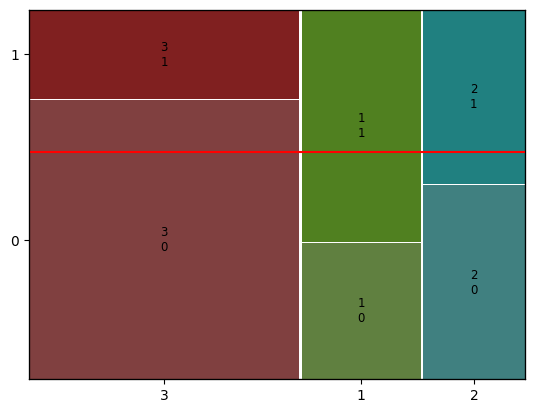

'\n빨간 선은 전체 자료의 평균 생존율을 의미한다.\nx축 길이는 각 객실등급 별 승객 수의 비율을 나타낸다.\n3등급 객실은 생존율이 전체 평균보다 낮았고, 1등급과 2등급 객실은 생존율이 전체 평균보다는\n높았음을 알 수 있다.\n'

In [59]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()


"""
빨간 선은 전체 자료의 평균 생존율을 의미한다.
x축 길이는 각 객실등급 별 승객 수의 비율을 나타낸다.
3등급 객실은 생존율이 전체 평균보다 낮았고, 1등급과 2등급 객실은 생존율이 전체 평균보다는
높았음을 알 수 있다.
"""

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


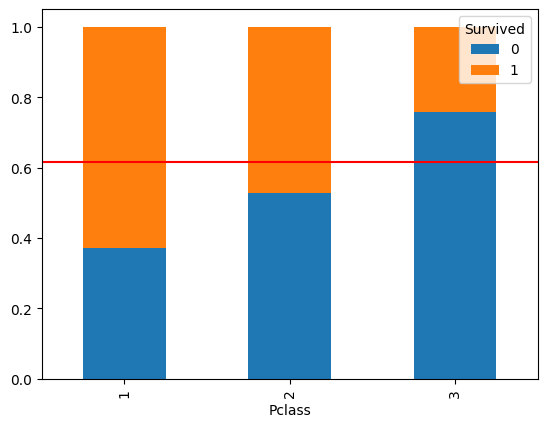

In [60]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

# 더 높은 객실등급일수록 생존율이 높았음을 알 수 있다.

비율만 비교하므로 양에 대한 비교는 할 수 없다!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 관계에 대해서 교차표와 시각화(mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


* [문1] Sex --> Survived

In [61]:
ct1 = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
print(ct1)


# 여성의 생존율이 남성보다 월등히 높았음을 알 수 있다.


Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


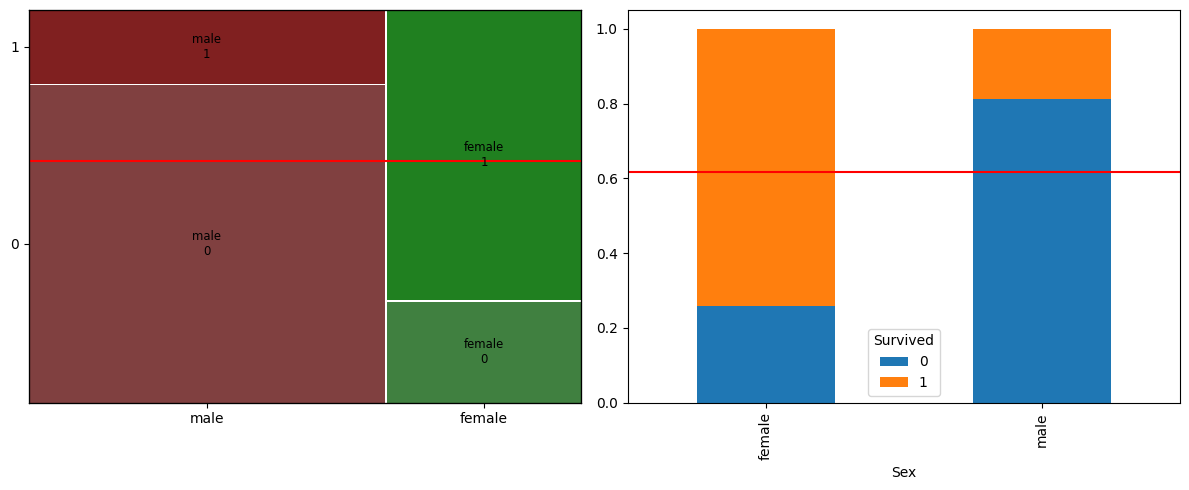

In [62]:
# Figure 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# mosaic plot
mosaic(titanic, ['Sex', 'Survived'], ax=axes[0])
axes[0].axhline(1 - titanic['Survived'].mean(), color='r')

# stacked bar
ct1.plot.bar(stacked=True, ax=axes[1])
axes[1].axhline(1 - titanic['Survived'].mean(), color='r')

plt.tight_layout()
plt.show()

# 탑승객은 남자가 훨씬 많앗고, 생존율은 여자가 훨씬 높았음을 알 수 있다.

* [문2] Embarked --> Survived

In [63]:
ct2 = pd.crosstab(titanic['Embarked'], titanic['Survived'])
print(ct2)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


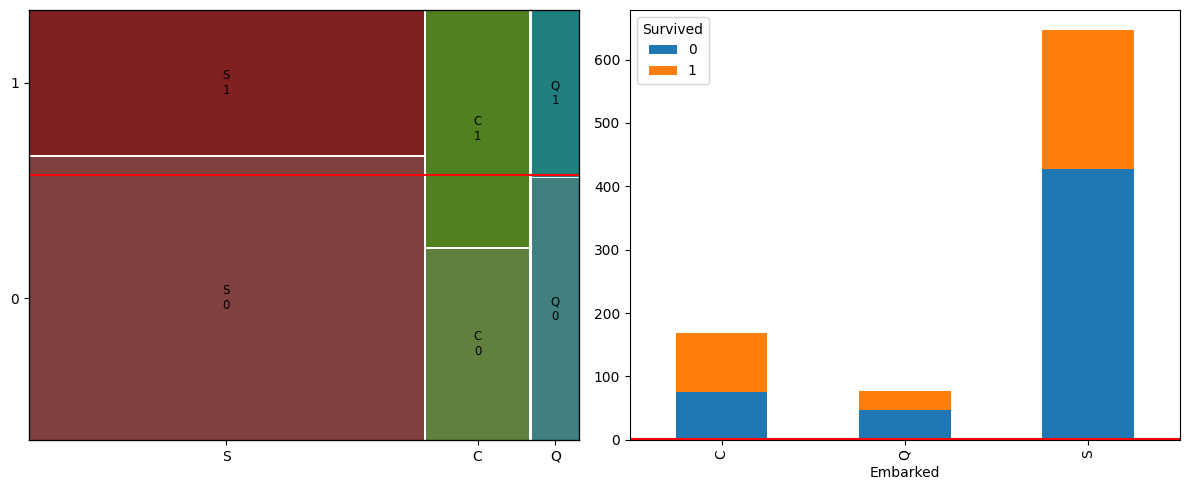

In [64]:
# Figure 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# mosaic plot
mosaic(titanic, ['Embarked', 'Survived'], ax=axes[0])
axes[0].axhline(1 - titanic['Survived'].mean(), color='r')

# stacked bar
ct2.plot.bar(stacked=True, ax=axes[1])
axes[1].axhline(1 - titanic['Survived'].mean(), color='r')

plt.tight_layout()
plt.show()

# 승선지별 생존율은 큰 차이를 보이지 않았다. S에서 생존율이 상대적으로 높았음을 알 수 있다.

* [문3] Title --> Survived

In [65]:
ct3 = pd.crosstab(titanic['Title'], titanic['Survived'])
print(ct3)

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3


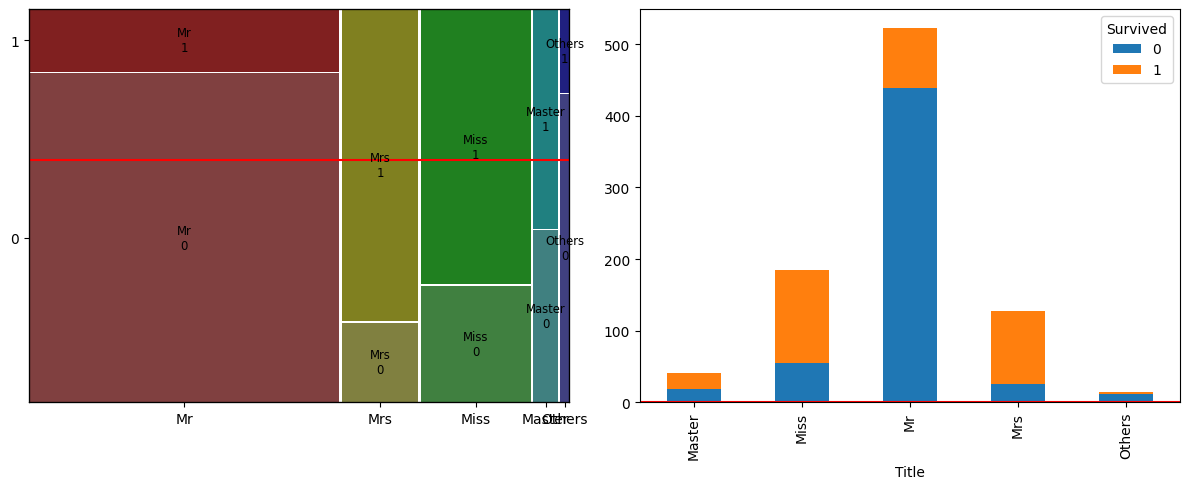

In [66]:
# Figure 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# mosaic plot
mosaic(titanic, ['Title', 'Survived'], ax=axes[0])
axes[0].axhline(1 - titanic['Survived'].mean(), color='r')

# stacked bar
ct3.plot.bar(stacked=True, ax=axes[1])
axes[1].axhline(1 - titanic['Survived'].mean(), color='r')

plt.tight_layout()
plt.show()

# Mr, 즉 기혼남성 승객이 압도적으로 많았음을 알 수 있고, 이들 대부분은 생존하지 못했다.
# 여성은 기혼 여부에 관계없이 생존률이 사망률보다 높았다.

### **(3) 수치화 : 카이제곱검정**

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다.

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

### (중요): 카이제곱 검정 시, 반드시 교차표를 만든 이후 수행하고, normalize하지 않는다.

In [67]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------


Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 수치화 해 봅시다.

* [문1] Sex --> Survived

In [74]:
table1 = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(table1)

Survived    0    1
Sex               
female     81  233
male      468  109


* [문2] Embarked --> Survived

In [73]:
table2 = pd.crosstab(titanic['Embarked'], titanic['Survived'])
print(table2)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


* [문3] Title --> Survived

In [75]:
table3= pd.crosstab(titanic['Title'], titanic['Survived'])
print(table3)

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3
